# AZ-204: Develop solutions that use Azure Cosmos DB

In [4]:
import sys
sys.path.append('./../utils')
import ai

➡️ Answers generated using AI, and grounded in the learn module. Mistakes are possible. Check important info.

DP-420: Designing and Implementing Cloud-Native Applications Using Microsoft Azure Cosmos DB
- 4 day
- https://learn.microsoft.com/en-us/training/courses/dp-420t00
- https://github.com/weslbo/dp-420

## Explore Azure Cosmos DB

In [5]:
%%learn
https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/


https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/1-introduction
https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/2-cosmos-db-benefits
https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/3-cosmos-db-resource-hierarchy
https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/4-cosmos-db-consistency-levels-overview
https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/5-choose-cosmos-db-consistency-level
https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/6-cosmos-db-supported-apis
https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/7-cosmos-db-request-units
https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/8-create-cosmos-db-resources-portal


('',
 'https://learn.microsoft.com/en-us/training/modules/explore-azure-cosmos-db/\n')

In [6]:
%%question
What is Azure Cosmos DB?

Azure Cosmos DB is a globally distributed, fully managed NoSQL database service by Microsoft Azure. It offers low latency, elastic scalability, well-defined data consistency options, and high availability. It allows you to read and write data from local replicas of your database and replicates data across all associated regions in your Cosmos account.

In [ ]:
%%mindmap
Give me an overview of the topics covered in this module

In [7]:
%%question
What kind of API's does Azure Cosmos DB provide?

Azure Cosmos DB provides several APIs, including:

1. **API for NoSQL**: Native to Azure Cosmos DB, stores data in document format.
2. **API for MongoDB**: Compatible with MongoDB wire protocol, uses BSON format.
3. **API for PostgreSQL**: Managed service for running PostgreSQL, supports distributed tables.
4. **API for Apache Cassandra**: Stores data in a column-oriented schema, compatible with Cassandra.
5. **API for Apache Gremlin**: Supports graph queries, stores data as edges and vertices.
6. **API for Table**: Stores data in key/value format, similar to Azure Table storage.

In [8]:
%%question
What does it mean when Azure Cosmos DB provides global replication?

Global replication in Azure Cosmos DB means that data is automatically and transparently replicated across multiple Azure regions. This ensures low latency access to data by placing it close to users, enhances availability by handling requests if a region is unavailable, and allows for both read and write operations in any configured region.

In [9]:
%%question
What is latency in the context of Cosmos DB? Why is it important?

Latency in the context of Cosmos DB refers to the time it takes for a database operation, such as a read or write, to complete. Low latency is crucial because it ensures that applications respond quickly to user actions, providing a better user experience. Azure Cosmos DB guarantees reads and writes in less than 10 milliseconds at the 99th percentile, which is critical for real-time applications and services that require fast data access.

In [10]:
%%question
What is the SLA provided by Cosmos DB?

Azure Cosmos DB provides a Service Level Agreement (SLA) that guarantees 99.999% availability for read and write operations in multi-region configurations. It also guarantees less than 10-millisecond latency for reads and writes at the 99th percentile, along with consistency levels and throughput.

In [11]:
%%question
Explain the hierarchy of a Cosmos DB account from top all the way to the lowest level. Compare this a classic relational database.

In Azure Cosmos DB, the hierarchy is organized as follows:

1. **Cosmos DB Account**: The top-level container for global distribution and high availability. It can span multiple Azure regions.

2. **Databases**: Under the account, databases act as namespaces for grouping related containers.

3. **Containers**: Within databases, containers store data and act as the fundamental unit of scalability. They use partition keys for data distribution.

4. **Items**: The data entities stored within containers. The format depends on the API used (e.g., documents for NoSQL, rows for Cassandra).

In a classic relational database:

1. **Database Server/Instance**: The top-level container hosting multiple databases.

2. **Databases**: Collections of related data organized into tables.

3. **Tables**: Structure within a database that organizes data into rows and columns.

4. **Rows**: Individual records within a table, analogous to items in Cosmos DB.

While Cosmos DB uses containers for scalability and partitioning, relational databases use tables. Cosmos DB's flexibility allows for schema-less data, unlike the rigid schema of relational tables.

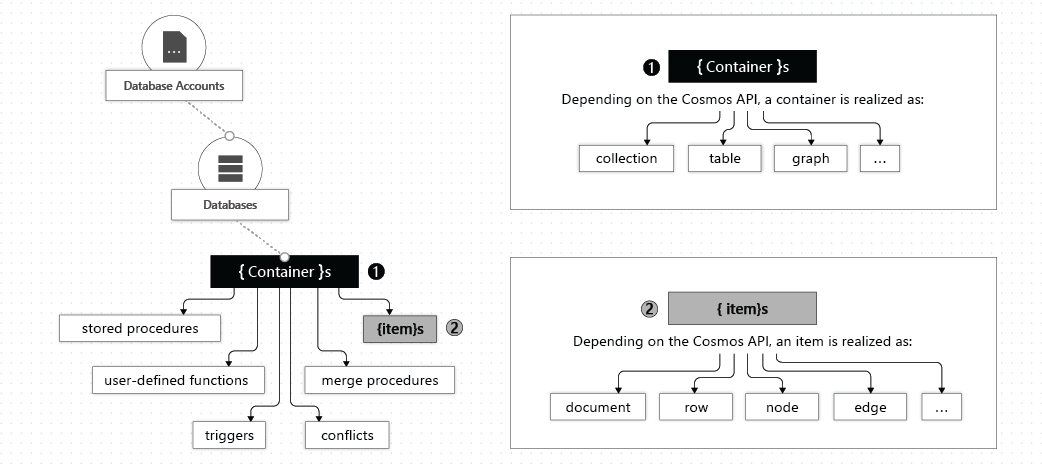

In [12]:
%%question
Can you explain from a conceptual point of view why a container is similar to a table in a relational database. What are the differences?

Conceptually, a container in Azure Cosmos DB is similar to a table in a relational database because both serve as structures to store and organize data:

**Similarities:**
- **Data Organization**: Both containers and tables are used to group and manage data records (items in containers, rows in tables).
- **Data Queries**: You can perform queries on both to retrieve and manipulate data.

**Differences:**
- **Schema**: Containers are schema-less, allowing flexible data models, while tables have a fixed schema with defined columns.
- **Scalability**: Containers are designed for horizontal scaling across multiple partitions, whereas tables typically scale vertically by increasing server size.
- **Partitioning**: Containers use partition keys for distributing data across physical partitions, enhancing scalability and performance. Tables in relational databases usually don't require explicit partitioning keys.
- **APIs**: Containers can be accessed using multiple APIs (NoSQL, MongoDB, etc.), while tables are accessed using SQL.
- **Consistency Models**: Containers offer different consistency levels, while relational databases typically offer strong consistency.

In [14]:
%%question
What are the consistency levels in Cosmos DB and how does this relate to a classic SQL Server database? Share a real life  example for each of the consistency levels

Azure Cosmos DB offers five consistency levels, each providing a different balance between consistency and availability:

1. **Strong Consistency**: Guarantees linearizability. Reads always return the most recent committed version. Similar to classic SQL Server's ACID transactions.
   - *Example*: A financial ledger where every transaction must be accurately recorded in sequence.

2. **Bounded Staleness**: Guarantees reads lag behind writes by a specified number of versions or time window. Ensures global order with lag.
   - *Example*: Social media feeds where updates are slightly delayed but in the correct order.

3. **Session Consistency**: Guarantees read-your-writes and monotonic reads within a session. Offers strong consistency for a single client session.
   - *Example*: A shopping cart application where a user sees their recent additions and modifications during their session.

4. **Consistent Prefix**: Guarantees reads never see out-of-order writes. Partial order is maintained.
   - *Example*: News updates where articles appear in the order they were written, but may be delayed.

5. **Eventual Consistency**: Guarantees eventual convergence without order. Reads might see older versions.
   - *Example*: Count of likes on a post where immediate accuracy isn't critical, but eventual consistency is sufficient.

In a classic SQL Server database, strong consistency is typically the default due to ACID compliance, ensuring immediate consistency across transactions. Other consistency levels in Cosmos DB offer flexibility for distributed applications where trade-offs between consistency and availability are necessary.

In [15]:
%%question
How does this relate to concurrency?

Consistency levels in Azure Cosmos DB relate to concurrency in terms of how data updates and reads are managed across distributed systems:

1. **Concurrency Control**: Different consistency levels offer various ways to handle concurrent reads and writes. Strong consistency ensures that all reads reflect the most recent write, which simplifies concurrency control but can impact performance and availability.

2. **Trade-offs**: Weaker consistency levels like eventual consistency allow for greater throughput and availability by relaxing constraints on concurrent operations. This can lead to scenarios where reads may not reflect the most recent writes, but the system remains highly available and performant.

3. **Application Design**: Depending on the consistency level chosen, application logic may need to handle potential conflicts or stale data due to concurrent operations. For example, eventual consistency might require conflict resolution mechanisms in the application layer.

In contrast, traditional SQL databases typically use locks and transactions to manage concurrency, ensuring immediate consistency but potentially reducing availability and throughput in distributed environments.

In [16]:
%%question
What are request units?


Request units (RUs) in Azure Cosmos DB are a currency for measuring the cost of database operations. They represent the system resources (like CPU, memory, and IOPS) required to perform operations such as reads, writes, and queries. Each operation consumes a specific number of RUs based on its complexity and data size. RUs help standardize and predict the performance cost across various APIs, providing a consistent way to provision and scale throughput in Cosmos DB.

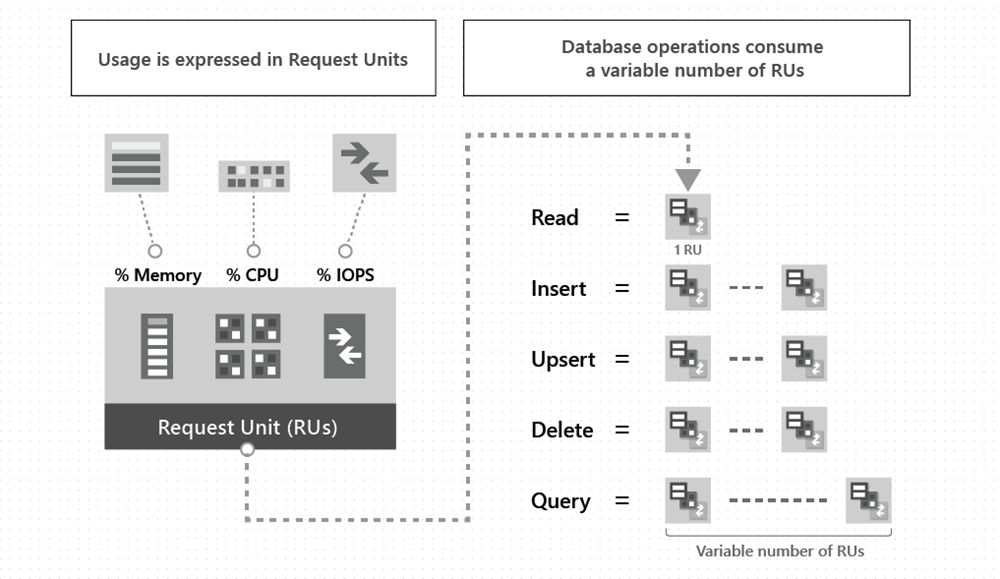

In [17]:
%%question
How many RU's would I need to be able to support 100 users concurrently writing 5 kb documents on average per second. 

To estimate the RUs needed, consider the following:

1. **Base RU for Write**: Writing a 1-KB document typically costs around 5 RUs.
2. **Size Factor**: Since your documents are 5 KB, multiply the base RU by 5 (5 KB / 1 KB).

So, each write is approximately 25 RUs (5 RUs * 5).

For 100 users writing documents concurrently per second:
- 100 users * 25 RUs per write = 2,500 RUs per second.

You would need to provision at least 2,500 RUs to support this workload. Keep in mind this is an estimate, and actual RU consumption may vary based on specific workload characteristics.

More information on calculator: https://cosmos.azure.com/capacitycalculator/

In [18]:
%%question
What happens when I do not have enough request units?


If you do not have enough request units (RUs) provisioned, your database operations may be throttled. This means:

- **Throttling**: Requests will be rate-limited, resulting in higher latency or failures with a "Request Rate Too Large" error.
- **Backoff**: Applications need to implement retry logic with exponential backoff to handle these errors gracefully.
- **Impact on Performance**: Users may experience slower response times or temporary unavailability of operations until RUs are adjusted or usage decreases.

In [19]:
%%question
Who allocates the request units? At what level?

Request units (RUs) are allocated by you, the user, and can be provisioned at two levels:

1. **Container Level**: You can specify a dedicated throughput for individual containers, ensuring that they have reserved RUs for their operations.

2. **Database Level**: You can provision RUs at the database level and share them across multiple containers. This allows up to 25 containers to share the allocated RUs, providing flexibility in resource utilization.

In [20]:
%%question
What is the difference between autoscale and serverless?

Autoscale and serverless are two different provisioning models in Azure Cosmos DB:

- **Autoscale**: Automatically adjusts the provisioned throughput (RUs) based on usage patterns. It scales up during peak times and scales down during low usage, ensuring performance while optimizing costs. You set a maximum RU limit, and the system dynamically scales within that range.

- **Serverless**: No need to provision throughput upfront. You are billed only for the RUs consumed by your operations. This model is ideal for applications with sporadic or unpredictable workloads, as it eliminates the need to manage throughput manually.

Both models aim to optimize cost and performance but cater to different workload patterns.

In [21]:
%%question
Are there any limitations on serverless to take into account?

Yes, there are a few limitations to consider when using serverless mode in Azure Cosmos DB:

1. **Maximum Storage**: Serverless accounts have a maximum storage limit, typically up to 50 GB.

2. **Workload Suitability**: Best for workloads with intermittent or unpredictable traffic. Not ideal for consistently high-throughput applications.

3. **Region Availability**: Serverless may not be available in all Azure regions.

4. **Performance**: There might be higher latency compared to provisioned throughput, especially for operations requiring high RUs.

These limitations should be evaluated to ensure serverless mode aligns with your application's requirements.

In [22]:
%%question
Why do I need to specify a partition key? What's the purpose?

Specifying a partition key in Azure Cosmos DB is essential for efficiently distributing data across partitions. The partition key:

1. **Distributes Data**: Helps evenly distribute data and workload across multiple physical partitions for scalability.
2. **Optimizes Performance**: Ensures that related data is stored together, minimizing cross-partition queries and improving read/write performance.
3. **Facilitates Scalability**: Allows the system to scale out by adding more partitions as data volume and throughput requirements grow.

Choosing an appropriate partition key is crucial for maintaining balanced partitions and efficient operations.

In [23]:
%%question
How would I design a set of databases and containers to store customer, orders, product catalog data? Does it make sense to store customers and orders into 1 container or can I use partioning?

When designing a set of databases and containers for customer, orders, and product catalog data in Azure Cosmos DB, consider the following:

1. **Separate Containers**:
   - **Customers**: Store customer profiles. Use a partition key like `customerId` for efficient access to individual customer data.
   - **Orders**: Store order details. Use a partition key like `orderId` or `customerId` if you frequently query orders by customer.
   - **Product Catalog**: Store product information. Use `productId` or `category` as a partition key for efficient product lookups.

2. **Combined Containers**:
   - You might combine **Customers** and **Orders** into one container if you have strong relationships between them and often need to query both together. Use a composite partition key like `customerId` or include order-specific fields for efficient querying.

**Considerations**:
- **Access Patterns**: Analyze how you access and query the data to determine the best partition key.
- **Data Volume**: Ensure partition keys distribute data evenly to avoid hotspots.
- **Flexibility**: Keep in mind that partitioning and container design should support future scalability and changes in access patterns.

Separating data into distinct containers is generally more flexible and scalable unless there's a compelling reason to combine them.

In [24]:
%%question
Can I do cross-database or cross-container SQL queries?

No, Azure Cosmos DB does not support cross-database or cross-container SQL queries directly. Each query is scoped to a single container, and you can't join data across containers or databases within a single query. To achieve similar functionality, you would need to handle data aggregation and processing in your application logic.

In [25]:
%%question
What is the purpose of the change feed?


The change feed in Azure Cosmos DB is used to capture and process changes (inserts and updates) made to items within a container. Its purposes include:

1. **Real-time Processing**: Enables applications to react to changes in data in real time, such as triggering workflows or updating other systems.
2. **Data Movement and Synchronization**: Facilitates data migration, replication, or synchronization between Cosmos DB and other data stores.
3. **Event-Driven Architectures**: Supports event sourcing patterns by allowing applications to consume changes as a stream of events.
4. **Analytics and Reporting**: Helps in maintaining up-to-date analytical systems by processing changes incrementally.

The change feed is powerful for implementing reactive and event-driven solutions.

## Work with Azure Cosmos DB

In [26]:
%%learn
https://learn.microsoft.com/en-us/training/modules/work-with-cosmos-db/

https://learn.microsoft.com/en-us/training/modules/work-with-cosmos-db/1-introduction
https://learn.microsoft.com/en-us/training/modules/work-with-cosmos-db/2-cosmos-db-dotnet-overview
https://learn.microsoft.com/en-us/training/modules/work-with-cosmos-db/4-cosmos-db-stored-procedures
https://learn.microsoft.com/en-us/training/modules/work-with-cosmos-db/5-cosmos-db-triggers-user-defined-functions
https://learn.microsoft.com/en-us/training/modules/work-with-cosmos-db/6-cosmos-db-change-feed


('',
 'https://learn.microsoft.com/en-us/training/modules/work-with-cosmos-db/\n')

In [27]:
%%question
What are the different SDK's available for Azure Cosmos DB?

Azure Cosmos DB supports multiple SDKs for different programming languages, including:

1. .NET SDK
2. Java SDK
3. Node.js SDK
4. Python SDK
5. JavaScript SDK
6. Go SDK

These SDKs allow you to interact with Azure Cosmos DB using the language of your choice.

In [28]:
%%question
How do I create a document in Cosmos DB using C#?

To create a document in Azure Cosmos DB using C#, you can use the Azure Cosmos .NET SDK v3. Here's a basic example:

1. **Initialize the CosmosClient**:
   ```csharp
   var cosmosClient = new CosmosClient("<your-connection-string>");
   ```

2. **Get a reference to the database and container**:
   ```csharp
   var database = await cosmosClient.CreateDatabaseIfNotExistsAsync("YourDatabaseName");
   var container = await database.Database.CreateContainerIfNotExistsAsync("YourContainerName", "/partitionKeyPath");
   ```

3. **Create a document**:
   ```csharp
   var item = new { id = "unique-id", partitionKey = "key", property1 = "value1", property2 = "value2" };
   await container.Container.CreateItemAsync(item, new PartitionKey("key"));
   ```

Replace `<your-connection-string>`, `"YourDatabaseName"`, `"YourContainerName"`, and the item properties with your actual values.

In [30]:
%%question
Is it required to provide a partition key during a point read operation? What happens if I don't provide this? Give me an example in C#

Yes, providing a partition key is required during a point read operation in Azure Cosmos DB. If you don't provide it, the operation will fail because Cosmos DB needs both the item ID and the partition key to locate the specific item efficiently.

Here's an example in C#:

```csharp
using Microsoft.Azure.Cosmos;
using System.Threading.Tasks;

public class CosmosDbExample
{
    private CosmosClient cosmosClient;
    private Container container;

    public CosmosDbExample(string connectionString, string databaseId, string containerId)
    {
        cosmosClient = new CosmosClient(connectionString);
        container = cosmosClient.GetContainer(databaseId, containerId);
    }

    public async Task<ItemResponse<dynamic>> ReadItemAsync(string itemId, string partitionKeyValue)
    {
        try
        {
            // Point read operation with partition key
            ItemResponse<dynamic> response = await container.ReadItemAsync<dynamic>(itemId, new PartitionKey(partitionKeyValue));
            return response;
        }
        catch (CosmosException ex)
        {
            // Handle the error
            Console.WriteLine($"Error: {ex.StatusCode}");
            return null;
        }
    }
}
```

In this example, `ReadItemAsync` requires both the `itemId` and the `partitionKeyValue`. If you omit the partition key, the operation will not succeed and will throw a `CosmosException`.

In [32]:
%%question
Why do I need to page through the result set when quering the container using a SQL Select command? Provide an example in C#

Paging through the result set is essential to efficiently handle large data sets and improve performance. Here's how you can implement paging in C# using the Azure Cosmos DB .NET SDK:

```csharp
using Microsoft.Azure.Cosmos;
using System;
using System.Collections.Generic;
using System.Threading.Tasks;

public class CosmosDbPaginationExample
{
    private CosmosClient cosmosClient;
    private Container container;

    public CosmosDbPaginationExample(string connectionString, string databaseId, string containerId)
    {
        cosmosClient = new CosmosClient(connectionString);
        container = cosmosClient.GetContainer(databaseId, containerId);
    }

    public async Task<List<dynamic>> QueryWithPaginationAsync(string queryString, int pageSize)
    {
        var queryDefinition = new QueryDefinition(queryString);
        var queryRequestOptions = new QueryRequestOptions
        {
            MaxItemCount = pageSize  // Set the number of items per page
        };

        var queryIterator = container.GetItemQueryIterator<dynamic>(queryDefinition, requestOptions: queryRequestOptions);
        List<dynamic> results = new List<dynamic>();

        while (queryIterator.HasMoreResults)
        {
            FeedResponse<dynamic> response = await queryIterator.ReadNextAsync();
            results.AddRange(response);

            Console.WriteLine("Page:");
            foreach (var item in response)
            {
                Console.WriteLine(item);
            }

            // Break after processing one page for demonstration
            break;
        }

        return results;
    }
}
```

### Explanation:
- **QueryDefinition**: Defines the SQL query to execute.
- **QueryRequestOptions**: Allows you to set options like `MaxItemCount` to limit the number of items per page.
- **GetItemQueryIterator**: Retrieves an iterator to page through results.
- **ReadNextAsync**: Reads the next page of results.

This example shows how to fetch and process one page of results. You can loop through the iterator to process all pages.

In [33]:
%%question
What language do I use to create a stored procedure?

You use JavaScript to create a stored procedure in Azure Cosmos DB.

In [34]:
%%question
At what level in the hierachy is a stored procedure created? How does this differ from a regular relational database?

A stored procedure in Azure Cosmos DB is created at the container level. This differs from a regular relational database, where stored procedures are typically created at the database level. In Cosmos DB, stored procedures are scoped to operate within the container they are defined in, allowing them to access and manipulate the items within that specific container.

In [35]:
%%question
Share an example on how to implement a stored procedure. It should contain an input parameter

Here's a simple example of a stored procedure in Azure Cosmos DB that takes an input parameter:

```javascript
function sampleStoredProcedure(inputParam) {
    var context = getContext();
    var response = context.getResponse();

    // Example logic: return a message with the input parameter
    var message = "Hello, " + inputParam;
    
    // Set the response body
    response.setBody(message);
}
```

### Explanation:
- **Function Definition**: The stored procedure is defined in JavaScript.
- **Input Parameter**: `inputParam` is the parameter passed to the stored procedure.
- **Response Object**: `getContext().getResponse()` is used to set the response that will be returned to the client.
- **Logic**: In this example, the stored procedure constructs a message that includes the input parameter and returns it.

To register and execute this stored procedure, you would use the Azure Cosmos DB SDK in your application and call this stored procedure with the required input.

In [37]:
%%question
Why would I implement transactions using stored procedures? Can I do without? Share an example on how to create the SP.

Implementing transactions using stored procedures in Azure Cosmos DB ensures that a set of operations (like create, update, or delete) are executed atomically within a single partition. This means that all operations succeed or fail together, maintaining data integrity.

Without stored procedures, you'd have to manage transactions at the application level, which can be more complex and less efficient.

Here's an example of a stored procedure to perform a transactional update:

```javascript
function updateItems(itemId, updateData) {
    var context = getContext();
    var container = context.getCollection();

    // Query filter to find the item
    var query = 'SELECT * FROM c WHERE c.id = @id';
    var parameters = [{ name: '@id', value: itemId }];
    var isAccepted = container.queryDocuments(
        container.getSelfLink(),
        { query: query, parameters: parameters },
        function (err, items, responseOptions) {
            if (err) throw new Error("Error: " + err.message);

            if (items.length > 0) {
                var item = items[0];

                // Update logic
                for (var key in updateData) {
                    item[key] = updateData[key];
                }

                var isUpdated = container.replaceDocument(item._self, item,
                    function (err, docReplaced) {
                        if (err) throw new Error("Update failed: " + err.message);
                        context.getResponse().setBody("Update succeeded");
                    });

                if (!isUpdated) throw new Error("Update not accepted");
            } else {
                throw new Error("Item not found");
            }
        });

    if (!isAccepted) throw new Error("Query not accepted");
}
```

### Explanation:
- **Query**: Fetches the item to update based on the `itemId`.
- **Update Logic**: Applies changes from `updateData` to the item.
- **Replace Document**: Updates the item in the database.
- **Atomicity**: Ensures that the fetch and update happen together as a single transaction.

This stored procedure ensures consistency by handling both reading and updating the item atomically.

In [38]:
%%question
Share a real life example (plus code) of both a pre- as well as a post-trigger.

Here's an example of both a pre-trigger and a post-trigger in Azure Cosmos DB.

### Pre-Trigger Example

A pre-trigger can be used to validate data or modify an item before it is inserted or updated. Here's a pre-trigger that adds a timestamp to an item if it's not already present.

**Pre-Trigger Code:**

```javascript
function preAddTimestamp() {
    var context = getContext();
    var request = context.getRequest();
    var item = request.getBody();

    // Check if the item already has a timestamp
    if (!item.timestamp) {
        item.timestamp = new Date().toISOString();
    }

    // Update the item in the request
    request.setBody(item);
}
```

### Post-Trigger Example

A post-trigger can be used to perform actions after an item has been inserted or modified. Here's a post-trigger that logs information about the newly added item.

**Post-Trigger Code:**

```javascript
function postLogItem() {
    var context = getContext();
    var request = context.getRequest();
    var item = request.getBody();

    var collection = context.getCollection();
    var collectionLink = collection.getSelfLink();

    // Log the item by adding it to a logging container
    var logItem = {
        id: generateLogId(),
        action: "ItemInserted",
        itemId: item.id,
        timestamp: new Date().toISOString()
    };

    var isAccepted = collection.createDocument(collectionLink, logItem, function (err, docCreated) {
        if (err) throw new Error("Log creation failed: " + err.message);
    });

    if (!isAccepted) throw new Error("Log creation not accepted");
}

function generateLogId() {
    return "log_" + Math.random().toString(36).substr(2, 9);
}
```

### Explanation:
- **Pre-Trigger**: Runs before the item is stored, adding a timestamp if it's missing.
- **Post-Trigger**: Runs after the item is stored, creating a log entry for the action performed.
- **Error Handling**: Both triggers check for errors and ensure that operations are accepted before proceeding.

These triggers help enforce business logic and audit actions within your database.

In [39]:
%%question
Share an example of a custom user-defined function. 

Here's an example of a custom user-defined function (UDF) in Azure Cosmos DB that calculates the sales tax for a given amount:

```javascript
function calculateSalesTax(amount, taxRate) {
    if (amount == null || taxRate == null) {
        throw new Error("Invalid input: amount and taxRate are required.");
    }
    return amount * taxRate;
}
```

### Explanation:
- **Function Name**: `calculateSalesTax`
- **Parameters**: Accepts `amount` and `taxRate` as input parameters.
- **Logic**: Multiplies the amount by the tax rate to calculate the sales tax.
- **Error Handling**: Checks for null values and throws an error if inputs are invalid.

This UDF can be used within a query to apply the sales tax calculation to data stored in Cosmos DB.

In [40]:
%%question
How do you work with the change feed?

To work with the change feed in Azure Cosmos DB, you can use either a push model or a pull model. Here's how to do it using both approaches:

### Push Model

1. **Azure Functions with Cosmos DB Trigger**:
   - Use Azure Functions to automatically trigger on each new event in the change feed.
   - This approach handles scaling and reliable event detection for you.

2. **Change Feed Processor**:
   - Use the Change Feed Processor library available in the .NET or Java SDKs.
   - Set up a monitored container for the change feed and a lease container to coordinate processing across multiple workers.
   - Implement a delegate function to process each batch of changes.

### Pull Model

- Implement your own logic to periodically poll the change feed.
- Manage state and concurrency on the client side.
- This model provides more control over the pace and partition of change reading, but requires more manual management.

**Example with Change Feed Processor in C#**:

```csharp
using Microsoft.Azure.Cosmos;
using System;
using System.Threading.Tasks;

public class ChangeFeedExample
{
    private CosmosClient cosmosClient;
    private Container monitoredContainer;
    private Container leaseContainer;

    public ChangeFeedExample(string connectionString, string databaseId, string monitoredContainerId, string leaseContainerId)
    {
        cosmosClient = new CosmosClient(connectionString);
        monitoredContainer = cosmosClient.GetContainer(databaseId, monitoredContainerId);
        leaseContainer = cosmosClient.GetContainer(databaseId, leaseContainerId);
    }

    public async Task StartChangeFeedProcessorAsync()
    {
        var processor = monitoredContainer.GetChangeFeedProcessorBuilder<dynamic>("changeFeedProcessor", HandleChangesAsync)
            .WithInstanceName("processorInstance")
            .WithLeaseContainer(leaseContainer)
            .Build();

        await processor.StartAsync();
    }

    private static Task HandleChangesAsync(ChangeFeedProcessorContext context, IReadOnlyCollection<dynamic> changes, CancellationToken cancellationToken)
    {
        foreach (var change in changes)
        {
            Console.WriteLine($"Detected change: {change}");
        }
        return Task.CompletedTask;
    }
}
```

### Explanation:

- **CosmosClient**: Initializes the Cosmos client and containers.
- **ChangeFeedProcessor**: Configures the change feed processor with a delegate function `HandleChangesAsync` to process changes.
- **Lease Container**: Manages state and coordinates processing across multiple instances.
- **StartAsync**: Begins listening for changes.

Using the change feed allows you to react to updates and perform actions like analytics, notifications, or downstream processing.